In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

In [132]:
class AlgorithmsDS:
    """ML algorithms."""
    
    errors = None
    w_list = None
    weights = None

    def __init__(self):
        """Constructor."""

    def gradient_descent(self, data, target, eta=1e-02, max_iter=1e04, min_weight_dist=1e-08):
        """Gradient descent algorithm."""
        
        self.errors = list()
        iter_num = 0
        target = target.reshape(target.shape[0], 1)
        weight_dist = np.inf
        self.weights = np.zeros(data.shape[1]).reshape(data.shape[1], 1)
        self.w_list = [self.weights.copy()]

        while weight_dist > min_weight_dist and iter_num < max_iter:
            target_pred = data.dot(self.weights)
            err = self.calc_mse(target, target_pred)
            
            new_weights = self.weights - 2 * eta * (data.T.dot(target_pred - target)) / target.shape[0]
            weight_dist = np.linalg.norm(new_weights - self.weights, ord=2)
            
            self.errors.append(err)
            self.w_list.append(new_weights.copy())

            iter_num += 1
            self.weights = new_weights
            
            if iter_num % 100 == 0:
                print(iter_num, self.weights, err)

        self.w_list = np.array(self.w_list)
        print(iter_num, self.weights, err)
        
    def gradient_descent_l1_reg(self, data, target, eta=1e-02, max_iter=1e04, min_weight_dist=1e-08, l1=1e-02):
        """Gradient descent with L1 regularization."""

        self.errors = list()
        iter_num = 0
        weight_dist = np.inf
        target = target.reshape(target.shape[0], 1)
        self.weights = np.zeros(data.shape[1]).reshape(data.shape[1], 1)
        self.w_list = [self.weights.copy()]
        
        while weight_dist > min_weight_dist and iter_num < max_iter:
            target_pred =  data.dot(self.weights)
            
            err = self.calc_mse_l1_reg(target, target_pred, l1)
            
            new_weights = self.weights - eta * (2 * data.T.dot(target_pred - target) / target.shape[0] + \
                                                l1 * np.sign(self.weights))
                
            weight_dist = np.linalg.norm(new_weights - self.weights, ord=2)
                
            self.errors.append(err)
            self.w_list.append(new_weights.copy())
            
            iter_num += 1
            self.weights = new_weights
            
            if iter_num % 100 == 0:
                print(iter_num, self.weights, err)
        
        self.w_list = np.array(self.w_list)
        print(iter_num, self.weights, err)
        
    def gradient_descent_l2_reg(self, data, target, eta=1e-02, max_iter=1e04, min_weight_dist=1e-08, l2=1e-02):
        """Gradient descent with L2 regularization."""

        self.errors = list()
        iter_num = 0
        weight_dist = np.inf
        target = target.reshape(target.shape[0], 1)
        self.weights = np.zeros(data.shape[1]).reshape(data.shape[1], 1)
        self.w_list = [self.weights.copy()]
        
        while weight_dist > min_weight_dist and iter_num < max_iter:
            target_pred =  data.dot(self.weights)
            
            err = self.calc_mse_l2_reg(target, target_pred, l2)
            
            new_weights = self.weights - 2 * eta * (data.T.dot(target_pred - target) / target.shape[0] + \
                                                    l2 * self.weights)
                
            weight_dist = np.linalg.norm(new_weights - self.weights, ord=2)
                
            self.errors.append(err)
            self.w_list.append(new_weights.copy())
            
            iter_num += 1
            self.weights = new_weights
            
            if iter_num % 100 == 0:
                print(iter_num, self.weights, err)
        
        self.w_list = np.array(self.w_list)
        print(iter_num, self.weights, err)

    @staticmethod
    def calc_mse(target, target_pred):
        """Mean squared error calculation."""

        err = np.mean((target - target_pred) ** 2)

        return err
    
    def calc_mse_l2_reg(self, target, target_pred, l2):
        """Mean squared error calculation with L2-regularization."""
        
        err = np.mean((target - target_pred) ** 2) + l2 * (np.sum(self.weights ** 2) ** (1 / 2))
        
        return err
    
    def calc_mse_l1_reg(self,target, target_pred, l1):
        """Mean squared error calculation with L1-regularization."""
        
        err = np.mean((target - target_pred) ** 2) + l1 * np.sum(np.absolute(self.weights))
        
        return err
    
    def stochastic_gradient_descent(self, data, target, eta=1e-04, max_iter=1e05, min_weight_dist=1e-08):
        """Stochastic gradient descent algorithm."""
        
        self.standartization(data)
        
        np.random.seed(1234)

        self.errors = list()
        iter_num = 0
        weight_dist = np.inf
        target = target.reshape(target.shape[0], 1)
        self.weights = np.zeros(data.shape[1]).reshape(data.shape[1], 1)
        self.w_list = [self.weights.copy()]
        
        while weight_dist > min_weight_dist and iter_num < max_iter:
            train_ind = np.random.randint(data.shape[0])
            
            target_pred = np.dot(data[train_ind], self.weights)

            new_weights = self.weights - 2 * eta * np.dot(data[train_ind].T.reshape(data.shape[1], 1),
                          (target_pred - target[train_ind]).reshape(1, 1)) / data.shape[1]
            
            err = self.calc_mse(target, data.dot(new_weights))
            weight_dist = np.linalg.norm(new_weights - self.weights, ord=2)
            
            self.errors.append(err)
            self.w_list.append(new_weights.copy())

            iter_num += 1
            self.weights = new_weights

        self.w_list = np.array(self.w_list)
        print(iter_num, self.weights, err)
    
    @staticmethod
    def standartization(data):
        """Z-score data Normalization algorithm."""
        
        means = np.mean(data, axis=0)
        stds = np.std(data, axis=0)

        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                data[i][j] = (data[i][j] - means[j]) / stds[j]


* 1) Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [110]:
data, target = datasets.make_regression(n_samples=10000,
                                        n_features = 2,
                                        n_informative = 2,
                                        n_targets = 1,
                                        noise = 5,
                                        coef = False,
                                        random_state = 2)

In [121]:
gdc_obj = AlgorithmsDS()
gdc_obj.gradient_descent_l1_reg(data, target)

100 [[41.05896484]
 [ 1.59046414]] 68.13011054460873
200 [[46.60833004]
 [ 1.64664255]] 26.444516933229306
300 [[47.3589177 ]
 [ 1.63427714]] 25.68204059673793
400 [[47.46050944]
 [ 1.63009506]] 25.668056660915358
500 [[47.47426862]
 [ 1.62921369]] 25.667799602981013
600 [[47.47613322]
 [ 1.62905472]] 25.667794868349034
700 [[47.47638604]
 [ 1.62902821]] 25.667794780997948
800 [[47.47642033]
 [ 1.629024  ]] 25.667794779384085
900 [[47.47642499]
 [ 1.62902335]] 25.667794779354235
921 [[47.47642524]
 [ 1.62902331]] 25.667794779353912


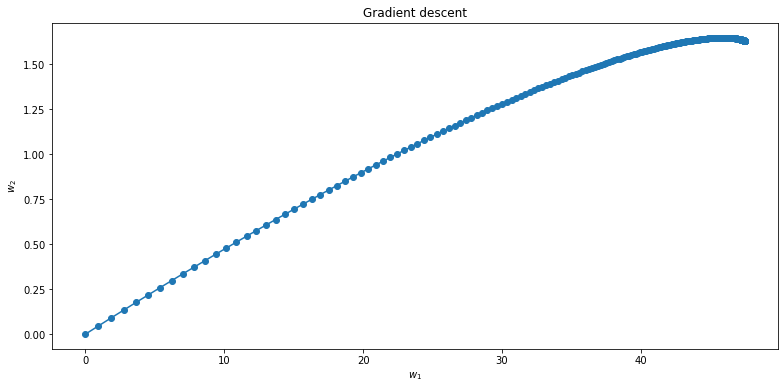

In [122]:
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.scatter(gdc_obj.w_list[:, 0], gdc_obj.w_list[:, 1])
plt.plot(gdc_obj.w_list[:, 0], gdc_obj.w_list[:, 1])
plt.show()

In [133]:
gdc_obj.gradient_descent_l2_reg(data, target)

NameError: name 'l1' is not defined

In [123]:
gdc_obj.gradient_descent(data, target)

100 [[41.06327849]
 [ 1.59467228]] 67.64804567608608
200 [[46.61322601]
 [ 1.65137705]] 25.953571225952672
300 [[47.36389061]
 [ 1.63907578]] 25.190939919731022
400 [[47.46549254]
 [ 1.63490148]] 25.17695325970542
500 [[47.47925307]
 [ 1.63402106]] 25.1766961535515
600 [[47.48111784]
 [ 1.63386221]] 25.176691418060578
700 [[47.48137069]
 [ 1.63383571]] 25.176691330694105
800 [[47.48140499]
 [ 1.6338315 ]] 25.176691329079958
900 [[47.48140964]
 [ 1.63383085]] 25.176691329050104
921 [[47.4814099 ]
 [ 1.63383081]] 25.176691329049785


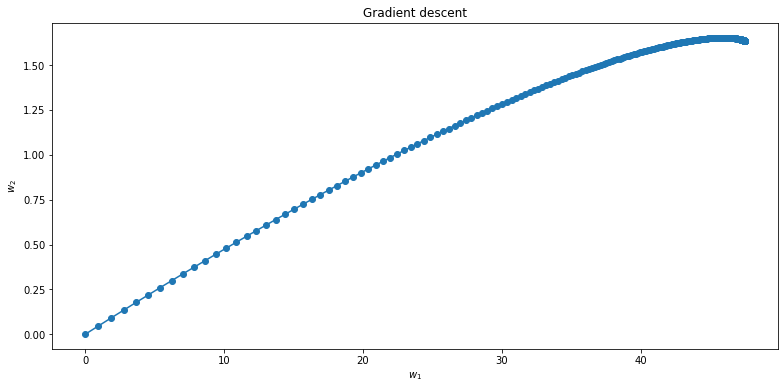

In [124]:
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.scatter(gdc_obj.w_list[:, 0], gdc_obj.w_list[:, 1])
plt.plot(gdc_obj.w_list[:, 0], gdc_obj.w_list[:, 1])
plt.show()

In [126]:
sgdc_obj = AlgorithmsDS()
sgdc_obj.stochastic_gradient_descent(data, target)

67880 [[47.21347889]
 [ 1.67558635]] 25.176731768359524


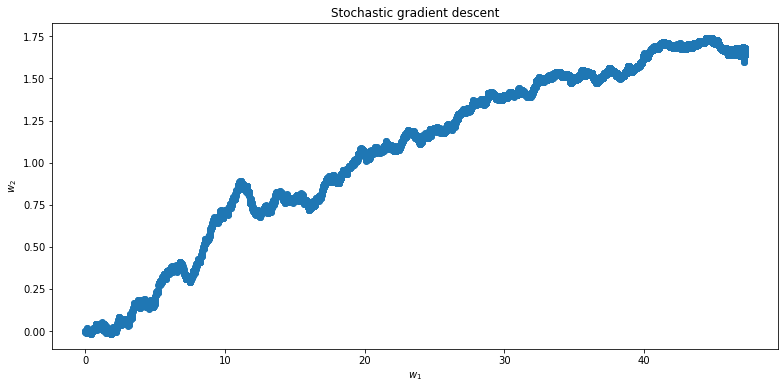

In [127]:
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.scatter(sgdc_obj.w_list[:, 0], sgdc_obj.w_list[:, 1])
plt.show()

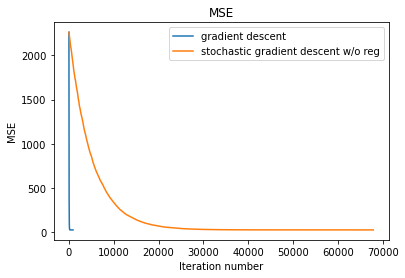

In [128]:
plt.plot(range(len(gdc_obj.errors)), gdc_obj.errors, label='gradient descent')
plt.plot(range(len(sgdc_obj.errors)), sgdc_obj.errors, label='stochastic gradient descent w/o reg')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()
plt.show()